In [1]:
import apw_path
import plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
%matplotlib inline

fname = 'Laurentia_shape/Laurentia.shp'
laurentia = ShapelyFeature(Reader(fname).geometries(),
            ccrs.PlateCarree(apw_path.lon_shift),
            edgecolor='black', facecolor='')

In [2]:
path1, poles, pole_names, pole_colors = apw_path.create_model(0, True)
apw_path.load_or_sample_model(path1)

path2, _, _, _ = apw_path.create_model(1, False)
apw_path.load_or_sample_model(path2)

path3, _, _, _ = apw_path.create_model(1, True)
apw_path.load_or_sample_model(path3)

path4, _, _, _ = apw_path.create_model(2, False)
apw_path.load_or_sample_model(path4)

path5, _, _, _ = apw_path.create_model(2, True)
apw_path.load_or_sample_model(path5)

Fitting Keweenawan APW track with TPW and 0 Euler rotations
Loading MCMC results from disk...
Done
Fitting Keweenawan APW track without TPW and 1 Euler rotation
Loading MCMC results from disk...
Done
Fitting Keweenawan APW track with TPW and 1 Euler rotation
Loading MCMC results from disk...
Done
Fitting Keweenawan APW track without TPW and 2 Euler rotations
Loading MCMC results from disk...
Done
Fitting Keweenawan APW track with TPW and 2 Euler rotations
Loading MCMC results from disk...
Done


Rotation 0: median 14.222808, credible interval  [ 13.27603037  15.17267598]
Rotation 0: median 2.902046, credible interval  [  1.27057452e-05   1.18842620e+01]
Rotation 1: median 29.446595, credible interval  [ 20.1286888   36.16873168]
Rotation 0: median 25.081090, credible interval  [ 20.32814997  32.276136  ]
Rotation 1: median 19.333027, credible interval  [ 11.66410212  31.1598314 ]
Rotation 0: median 14.439265, credible interval  [  4.50324986  21.56579061]
Rotation 1: median 15.330908, credible interval  [  7.22382698  24.79398989]
Rotation 2: median 4.173827, credible interval  [  8.56509003e-05   1.85194931e+01]


/home/ian/anaconda/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


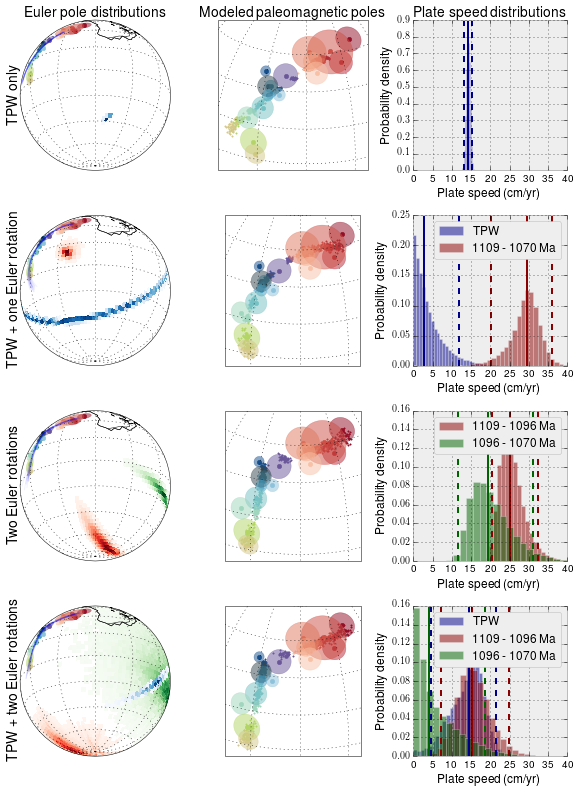

In [3]:
fig = plt.figure(figsize=(8,11))

index = 1
def plot_row(path, title):
    global index
    ax1 = fig.add_subplot(4,3,index, projection = ccrs.Orthographic(240.-apw_path.lon_shift, -20))
        
    ax2 = fig.add_subplot(4,3,index+1, projection = ccrs.Orthographic(200-apw_path.lon_shift,30.))
    ax3 = fig.add_subplot(4,3,index+2)
    plotting.plot_synthetic_paths(path, poles, pole_colors, ax1)
    ax1.add_feature(laurentia)
    plotting.plot_synthetic_poles(path, poles, pole_colors, ax2)
    plotting.plot_plate_speeds(path, poles, ax3)
    if index == 1:
        ax1.text(0.5, 1., 'Euler pole distributions',
            horizontalalignment='center',
            verticalalignment='bottom',
            size = 14,
            transform=ax1.transAxes)
        ax2.text(0.5, 1., 'Modeled paleomagnetic poles',
            horizontalalignment='center',
            verticalalignment='bottom',
            size = 14,
            transform=ax2.transAxes)
        ax3.text(0.5, 1., 'Plate speed distributions',
            horizontalalignment='center',
            verticalalignment='bottom',
            size = 14,
            transform=ax3.transAxes)
    ax1.text(0., 0.5, title,
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        size=14,
        transform=ax1.transAxes)
    index += 3

plot_row(path1, 'TPW only')
plot_row(path3, 'TPW + one Euler rotation')
plot_row(path4, 'Two Euler rotations')
plot_row(path5, 'TPW + two Euler rotations')
fig.tight_layout()
plt.savefig('many_inversions.pdf')
plt.show()

Rotation 0: median 14.222808, credible interval  [ 13.27603037  15.17267598]


/home/ian/anaconda/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


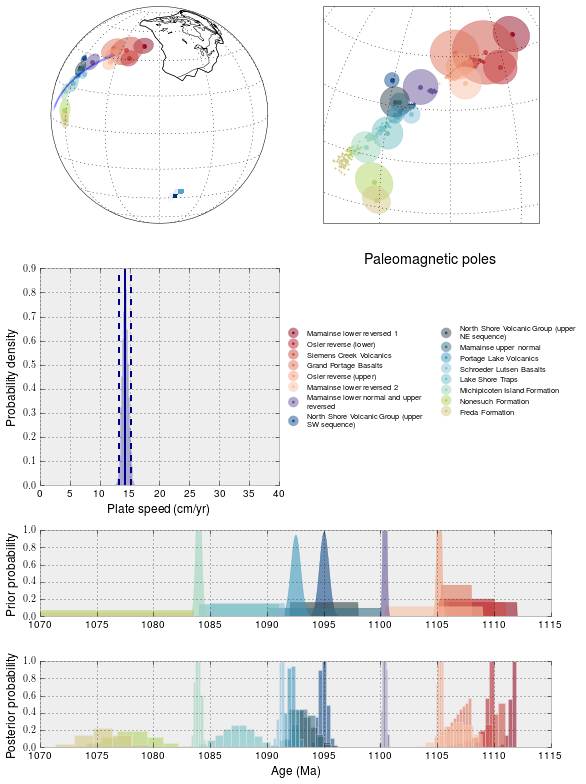

Rotation 0: median 30.490001, credible interval  [ 26.90793091  34.31090361]


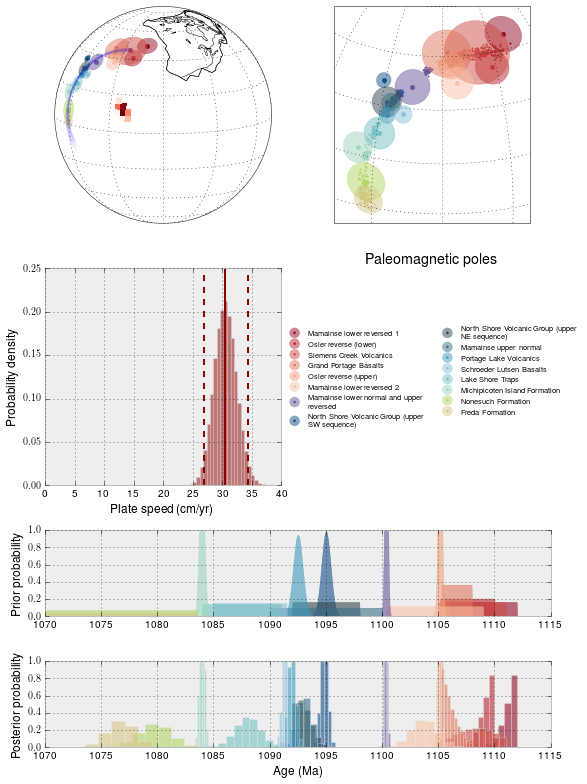

Rotation 0: median 2.902046, credible interval  [  1.27057452e-05   1.18842620e+01]
Rotation 1: median 29.446595, credible interval  [ 20.1286888   36.16873168]


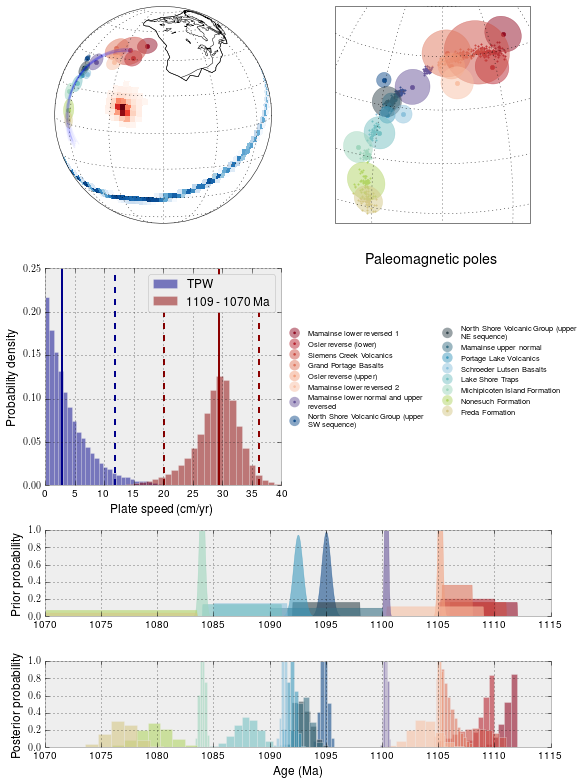

Rotation 0: median 25.081090, credible interval  [ 20.32814997  32.276136  ]
Rotation 1: median 19.333027, credible interval  [ 11.66410212  31.1598314 ]
Changepoint 0: median 1096.911291, credible interval  [ 1095.36137667  1098.68211377]


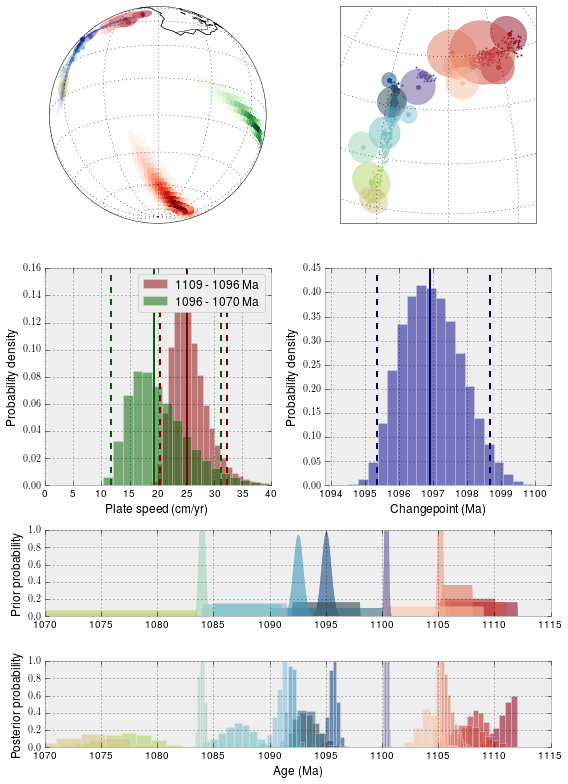

Rotation 0: median 14.439265, credible interval  [  4.50324986  21.56579061]
Rotation 1: median 15.330908, credible interval  [  7.22382698  24.79398989]
Rotation 2: median 4.173827, credible interval  [  8.56509003e-05   1.85194931e+01]
Changepoint 0: median 1096.901938, credible interval  [ 1095.33833745  1098.69928986]


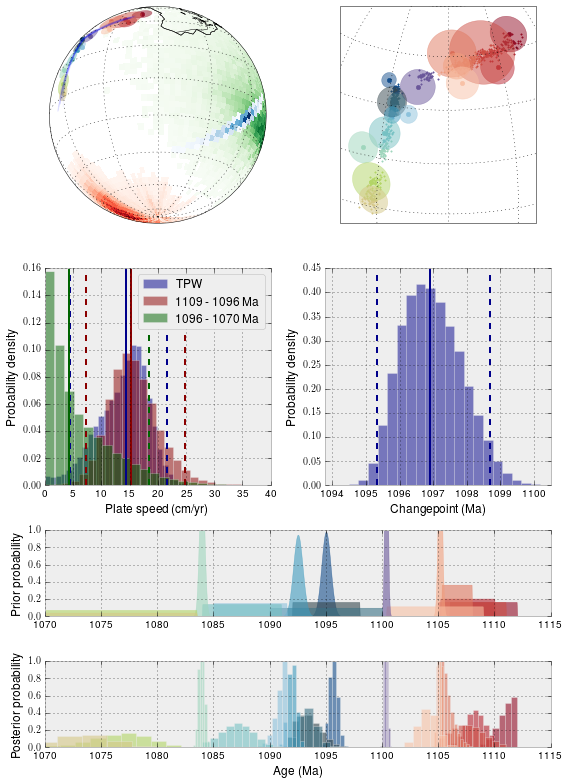

In [4]:
def plot_inversion_summary(path, lon0, lat0, title):
    fig = plt.figure( figsize = (8,11) )

    ax1 = plt.subplot2grid( (6,4), (0,0), colspan=2, rowspan=2, projection=ccrs.Orthographic(lon0-apw_path.lon_shift, lat0))
    ax2 = plt.subplot2grid( (6,4), (0,2), colspan=2, rowspan=2, projection=ccrs.Orthographic(200-apw_path.lon_shift,30.))        
    ax3 = plt.subplot2grid( (6,4), (2,0), colspan=2, rowspan=2 )
    ax4 = plt.subplot2grid( (6,4), (2,2), colspan=2, rowspan=2 )
    ax5 = plt.subplot2grid( (6,4), (4,0), colspan=4, rowspan=1 )
    ax6 = plt.subplot2grid( (6,4), (5,0), colspan=4, rowspan=1)

    plotting.plot_synthetic_paths(path, poles, pole_colors, ax1)
    ax1.add_feature(laurentia)
    plotting.plot_synthetic_poles(path, poles, pole_colors, ax2)
    plotting.plot_plate_speeds(path, poles, ax3, '')
    if path.n_euler_rotations < 2:
        plotting.make_legend(pole_names, pole_colors, ax4, 'Paleomagnetic poles')
    else:
        plotting.plot_changepoints(path, ax4)
    plotting.plot_age_samples(path, poles, pole_colors, ax5, ax6)
    fig.tight_layout()
    plt.savefig(title+'.pdf')
    plt.show()
    
plot_inversion_summary(path1, 240., 10., 'tpw_only')
plot_inversion_summary(path2, 240., 10., 'one_euler_pole')
plot_inversion_summary(path3, 240., 10., 'one_euler_pole_and_tpw')
plot_inversion_summary(path4, 240., -20., 'two_euler_poles')
plot_inversion_summary(path5, 240., -20., 'two_euler_poles_and_tpw')



/home/ian/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


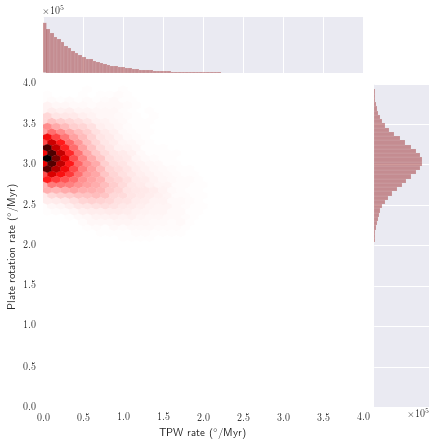

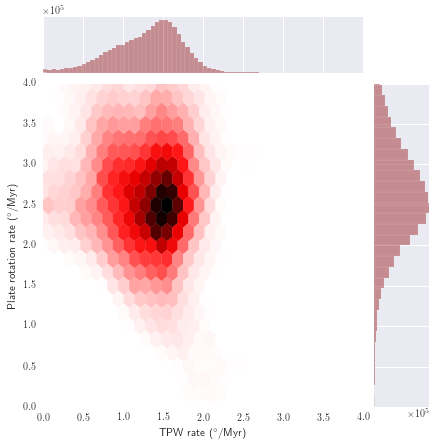

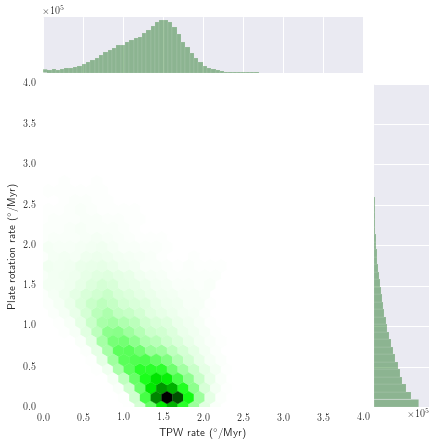

In [5]:
import seaborn as sns

def make_jointplot(tpw_rate, euler_rate, color, title):
    jp = sns.jointplot(tpw_rate, euler_rate, kind="hex",\
                       xlim=(0,4), ylim=(0,4),
                       stat_func=None, color=color, gridsize=(20,20))
    jp.set_axis_labels("TPW rate ($^\circ$/Myr)", "Plate rotation rate ($^\circ$/Myr)")
    jp.ax_joint.set_axis_bgcolor("white")
    plt.savefig(title+'.pdf')
    

make_jointplot(path3.tpw_rates(), path3.euler_rates()[0], 'darkred', 'one_euler_jointplot')
make_jointplot(path5.tpw_rates(), path5.euler_rates()[0], 'darkred', 'two_euler_jointplot_1')
make_jointplot(path5.tpw_rates(), path5.euler_rates()[1], 'darkgreen', 'two_euler_jointplot_2')


 [-----------------100%-----------------] 10000 of 10000 complete in 148.9 sec34.9001234028 8.54814340035 12.1099030932


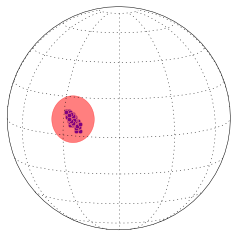

In [40]:
# Estimate the mean and concentration of a set of points
# from the posterior using a VMF distribution
import pymc
import numpy as np
import mcplates

# Create a model where the model parameters are a VMF distribution
model_parameters = []
kappa = pymc.Exponential('kappa', 1.)
lon_lat = VonMisesFisher('lon_lat', lon_lat=(0.,0.), kappa=0.)
model_parameters.append(kappa)
model_parameters.append(lon_lat)

# Sample ~200 points from the posterior
data = path2.euler_directions()[0][::10000]
for sample in data:
    model_parameters.append(mcplates.VonMisesFisher('direction', lon_lat=lon_lat, kappa=kappa, value=sample, observed=True))

# Invert for the VMF parameters
model =pymc.Model(model_parameters)
mcmc = pymc.MCMC(model)
mcmc.sample(10000, 1000, 1)

# Plot them up
kappa_trace = mcmc.trace('kappa')[:]
lon_trace = np.mod(mcmc.trace('lon_lat')[:,0],360.)
lat_trace = mcmc.trace('lon_lat')[:,1]

lon = np.median(lon_trace)
lat = np.median(lat_trace)
a95 = mcplates.two_sigma_from_kappa(np.median(kappa_trace))
print lon,lat,a95

ax = plt.axes(projection = ccrs.Orthographic(240-apw_path.lon_shift,10))
ax.gridlines()
ax.set_global()
pole = mcplates.PaleomagneticPole(lon, lat, angular_error=a95)
pole.plot(ax, color='r')
ax.scatter(data[:,0], data[:,1], transform=ccrs.PlateCarree())


plt.show()